In [1]:
!nvidia-smi

Sat Dec  4 07:16:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Set Up New Environment


In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


In [3]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja
!pip install torch==1.7

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 1.12 MiB | 7.26 MiB/s, done.
Resolving deltas: 100% (58/58), done.
     |████████████████████████████████| 108 kB 5.2 MB/s 
     |████████████████████████████████| 776.7 MB 4.4 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires torch==1.10.0, but you have torch 1.7.0 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.7.0 which is incompatible.


In [ ]:
!ls /content/drive/MyDrive/my_face_dataset_256/images

'glasses (100).jpg'	  'glasses_mask (274).jpg'    'just_face (268).jpg'
'glasses (101).jpg'	  'glasses_mask (275).jpg'    'just_face (269).jpg'
'glasses (102).jpg'	  'glasses_mask (276).jpg'    'just_face (26).jpg'
'glasses (103).jpg'	  'glasses_mask (277).jpg'    'just_face (270).jpg'
'glasses (104).jpg'	  'glasses_mask (278).jpg'    'just_face (271).jpg'
'glasses (105).jpg'	  'glasses_mask (279).jpg'    'just_face (272).jpg'
'glasses (106).jpg'	  'glasses_mask (27).jpg'     'just_face (273).jpg'
'glasses (107).jpg'	  'glasses_mask (280).jpg'    'just_face (274).jpg'
'glasses (108).jpg'	  'glasses_mask (281).jpg'    'just_face (275).jpg'
'glasses (109).jpg'	  'glasses_mask (282).jpg'    'just_face (276).jpg'
'glasses (10).jpg'	  'glasses_mask (283).jpg'    'just_face (277).jpg'
'glasses (110).jpg'	  'glasses_mask (284).jpg'    'just_face (278).jpg'
'glasses (111).jpg'	  'glasses_mask (285).jpg'    'just_face (279).jpg'
'glasses (112).jpg'	  'glasses_mask (286).jpg'    'just_face (27).

# Convert Images

In [ ]:
# !python /content/stylegan2-ada-pytorch/dataset_tool.py --source /content/drive/MyDrive/data/gan/images/circuit --dest /content/drive/MyDrive/data/gan/dataset/circuit

In [ ]:
#!rm -R /content/drive/MyDrive/data/gan/dataset/circuit/*

# Clean Up Images

It is important that all images have the same dimensions and color depth.  This code can identify images that have issues.

In [ ]:
from os import listdir
from os.path import isfile, join
import os
from PIL import Image
from tqdm.notebook import tqdm

IMAGE_PATH = '/content/drive/MyDrive/my_face_dataset_256/images'
files = [f for f in listdir(IMAGE_PATH) if isfile(join(IMAGE_PATH, f))]

base_size = (256, 256)
for file in tqdm(files):
  file2 = os.path.join(IMAGE_PATH,file)
  img = Image.open(file2)
  sz = img.size
  if base_size and sz!=base_size:
    print(f"Inconsistant size: {file2}")
  elif img.mode!='RGB':
    print(f"Inconsistant color format: {file2}")
  else:
    base_size = sz


  0%|          | 0/1174 [00:00<?, ?it/s]

# Perform Initial Training

In [ ]:
import os

# Modify these to suit your needs
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments"
DATA = "/content/drive/MyDrive/my_face_dataset_256/"
SNAP = 10

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --outdir {EXPERIMENTS} --data {DATA}"
!{cmd}


Aborted!


# Resume Training

In [6]:
import os
NETWORK = "network-snapshot-000048.pkl"
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments"
RESUME = os.path.join(EXPERIMENTS, "00011--auto1-resumecustom/", NETWORK)

In [ ]:
DATA = "/content/drive/MyDrive/my_face_dataset_256/"

In [ ]:
SNAP = 6
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --outdir {EXPERIMENTS} --data {DATA} --resume \"{RESUME}\"" 
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 6,
  "network_snapshot_ticks": 6,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/my_face_dataset_256/",
    "use_labels": false,
    "max_size": 1174,
    "xflip": false,
    "resolution": 256
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 16384,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 16384,
    

# Generate

In [ ]:
!python /content/stylegan2-ada-pytorch/train.py --help

In [12]:
cmd = f"python /content/stylegan2-ada-pytorch/generate.py --network={RESUME} --seeds=1,2,3 --outdir=/content"
!{cmd}

Loading networks from "/content/drive/MyDrive/data/gan/experiments/00011--auto1-resumecustom/network-snapshot-000048.pkl"...
Generating image for seed 1 (0/3) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 2 (1/3) ...
Generating image for seed 3 (2/3) ...


In [13]:
import PIL

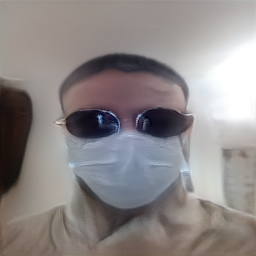

In [17]:
PIL.Image.open('seed0001.png')

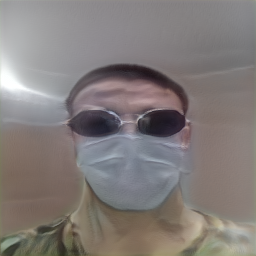

In [19]:
PIL.Image.open('seed0003.png')

In [24]:
cmd = f"python /content/stylegan2-ada-pytorch/generate.py --network={RESUME} --seeds=12341241,1991,1488,777,666,232323 --outdir=/content"
!{cmd}

Loading networks from "/content/drive/MyDrive/data/gan/experiments/00011--auto1-resumecustom/network-snapshot-000048.pkl"...
Generating image for seed 12341241 (0/6) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 1991 (1/6) ...
Generating image for seed 1488 (2/6) ...
Generating image for seed 777 (3/6) ...
Generating image for seed 666 (4/6) ...
Generating image for seed 232323 (5/6) ...


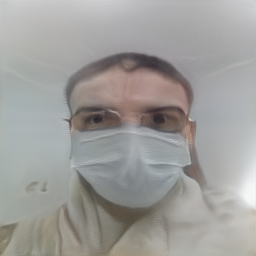

In [21]:
PIL.Image.open('seed12341241.png')

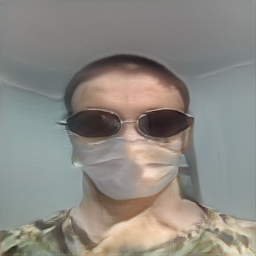

In [26]:
PIL.Image.open('seed0777.png')